In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/The School of AI/EVA Program/Assignment_8_ResNet

/content/drive/MyDrive/The School of AI/EVA Program/Assignment_8_ResNet


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchsummary import summary
import numpy as np

### Loading the modular files

In [9]:
from files.train_test_transform import train_test_transform
from files.train_test_data_loader import train_test_data_loader
from files.model import Net
from files.trainer import Training
from files.resnet import  ResNet18

### Calculating mean and std for normalization

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_transforms, test_transforms = train_test_transform()

train_data_set = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform= train_transforms)
test_data_set = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform= test_transforms)

train_data = train_data_set.data
test_data = test_data_set.data

train_test_combine = np.concatenate((train_data, test_data),axis=0)
train_test_combine.reshape(-1,train_test_combine.shape[-1])
std=train_test_combine.reshape(-1,train_test_combine.shape[-1]).mean(0)/255
mean=train_test_combine.reshape(-1,train_test_combine.shape[-1]).std(0)/255

Files already downloaded and verified
Files already downloaded and verified


### Transforming the data and generating data loader

In [11]:
train_transforms, test_transforms = train_test_transform(normalize= True, mean= mean, std= std)
train_loader, test_loader = train_test_data_loader(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


### Exploring the input data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


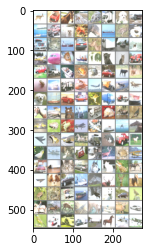

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###  Training the model


In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model =  ResNet18()
model.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)    
trainer1 = Training(model, optimizer, train_loader, test_loader, device)
train_metric, test_metric = trainer1.train(n_epoch=25)

Training the model for 25 epochs
EPOCH: 1




Test set: Average loss: 0.0070, Accuracy: 8513/10000 (85.13%)

EPOCH: 2




Test set: Average loss: 0.0067, Accuracy: 8527/10000 (85.27%)

EPOCH: 3




Test set: Average loss: 0.0067, Accuracy: 8556/10000 (85.56%)

EPOCH: 4




Test set: Average loss: 0.0068, Accuracy: 8566/10000 (85.66%)

EPOCH: 5




Test set: Average loss: 0.0068, Accuracy: 8555/10000 (85.55%)

EPOCH: 6




Test set: Average loss: 0.0068, Accuracy: 8553/10000 (85.53%)

EPOCH: 7




Test set: Average loss: 0.0069, Accuracy: 8573/10000 (85.73%)

EPOCH: 8




Test set: Average loss: 0.0069, Accuracy: 8567/10000 (85.67%)

EPOCH: 9




Test set: Average loss: 0.0069, Accuracy: 8573/10000 (85.73%)

EPOCH: 10




Test set: Average loss: 0.0069, Accuracy: 8570/10000 (85.70%)

EPOCH: 11




Test set: Average loss: 0.0068, Accuracy: 8572/10000 (85.72%)

EPOCH: 12




Test set: Average loss: 0.0070, Accuracy: 8548/10000 (85.48%)

EPOCH: 13




Test set: Average loss: 0.0069, Accuracy: 8560/10000 (85.60%)

EPOCH: 14




Test set: Average loss: 0.0070, Accuracy: 8568/10000 (85.68%)

EPOCH: 15




Test set: Average loss: 0.0070, Accuracy: 8570/10000 (85.70%)

EPOCH: 16




Test set: Average loss: 0.0069, Accuracy: 8569/10000 (85.69%)

EPOCH: 17




Test set: Average loss: 0.0070, Accuracy: 8563/10000 (85.63%)

EPOCH: 18




Test set: Average loss: 0.0069, Accuracy: 8564/10000 (85.64%)

EPOCH: 19




Test set: Average loss: 0.0070, Accuracy: 8565/10000 (85.65%)

EPOCH: 20




Test set: Average loss: 0.0070, Accuracy: 8568/10000 (85.68%)

EPOCH: 21




Test set: Average loss: 0.0070, Accuracy: 8572/10000 (85.72%)

EPOCH: 22




Test set: Average loss: 0.0070, Accuracy: 8577/10000 (85.77%)

EPOCH: 23




Test set: Average loss: 0.0069, Accuracy: 8565/10000 (85.65%)

EPOCH: 24




Test set: Average loss: 0.0070, Accuracy: 8557/10000 (85.57%)

EPOCH: 25




Test set: Average loss: 0.0070, Accuracy: 8571/10000 (85.71%)



**Result**

Best test accuracy: 85.77% (22nd epoch)